```
Kalau kita buat listnya/summary dari perintah di module kode id :

A. Area Plot (a) 
B. Histogram (a)
C. Bar Chart (a) 
D. Pie Chart (a)
E. Box Plot  (a)
F. Scatter Plot (a) 
G. Word Clouds
H. Overall Analysis

*for each plot (A - F):
- Question/what data we want to visualize
- Pre-processing as needed
- (a)or analysis :: Conclusion / Kesimpulan
```

---
# A. Area Plot

In [135]:
# Question: ......

In [136]:
# 1. pre-processing as needed

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
#read csv
df_london = pd.read_csv('D:/Kuliah/Hacktiv8/Sesi/dataset/london_crime_by_lsoa.csv')
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [139]:
#cek missing value
df_london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [140]:
#cek tipe data
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [141]:
#ubah nama kolom jd string
df_london.columns = list(map(str, df_london.columns))

In [142]:
#group
df_group = df_london.groupby(['borough', 'year'])[['value']].sum()
df_group

value
borough              year       
Barking and Dagenham 2008  17656
                     2009  17713
                     2010  17130
                     2011  16686
                     2012  15990
...                          ...
Westminster          2012  59226
                     2013  53852
                     2014  47564
                     2015  47395
                     2016  48330

[297 rows x 1 columns]

In [143]:
#ubah nama kolom value jadi total
df_group.rename(columns={"value":"total"}, inplace=True)

In [144]:
#reset index menjadi awal terlebih dahulu
df_group.reset_index(inplace=True)

In [145]:
df_group

,borough,year,total
0,Barking and Dagenham,2008,17656
1,Barking and Dagenham,2009,17713
2,Barking and Dagenham,2010,17130
3,Barking and Dagenham,2011,16686
4,Barking and Dagenham,2012,15990
...,...,...,...
292,Westminster,2012,59226
293,Westminster,2013,53852
294,Westminster,2014,47564
295,Westminster,2015,47395


In [146]:
#buat variabel years utk menampung list years yg ada di dlm dataframe df_group
boroughs = list(df_group["borough"].unique())
boroughs

['Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'City of London',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

In [147]:
#buat variabel years utk menampung list years yg ada di dlm dataframe df_group
years = list(df_group["year"].unique())
years

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [148]:
#inisiasi dataframe kosong dari kolom years dan index boroughs
df_boryear = pd.DataFrame(None, columns=years, index=boroughs)
df_boryear.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016
Barking and Dagenham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bexley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bromley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
#mengisi data pada dataframe df_boryear
for borough in boroughs:
    for year in years:
        df_boryear.at[borough, year] = int(df_group.loc[
            (df_group["borough"] == borough)
            & (df_group["year"] == year), "total"
        ])

In [150]:
#buat kolom total yg akan digunakan  utk mengurutkan borough
df_boryear["total"] = df_boryear.sum(axis=1)

In [151]:
#urutkan data berdasarkan kolom total scr descending
df_boryear.sort_values(["total"], ascending=False, inplace=True)

In [152]:
#ambil 5 data teratas
df_top5 = df_boryear.head()
df_top5

,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028.0
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178.0
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809.0
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147.0
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024.0


In [153]:
#hapus kolom total krn tdk dibutuhkan dlm pembuatan area plot
del df_top5["total"]

In [154]:
#transpose df_top5bor
df_top5bor = df_top5.transpose()
df_top5bor

,Westminster,Lambeth,Southwark,Camden,Newham
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


In [155]:
# 2. create visualization

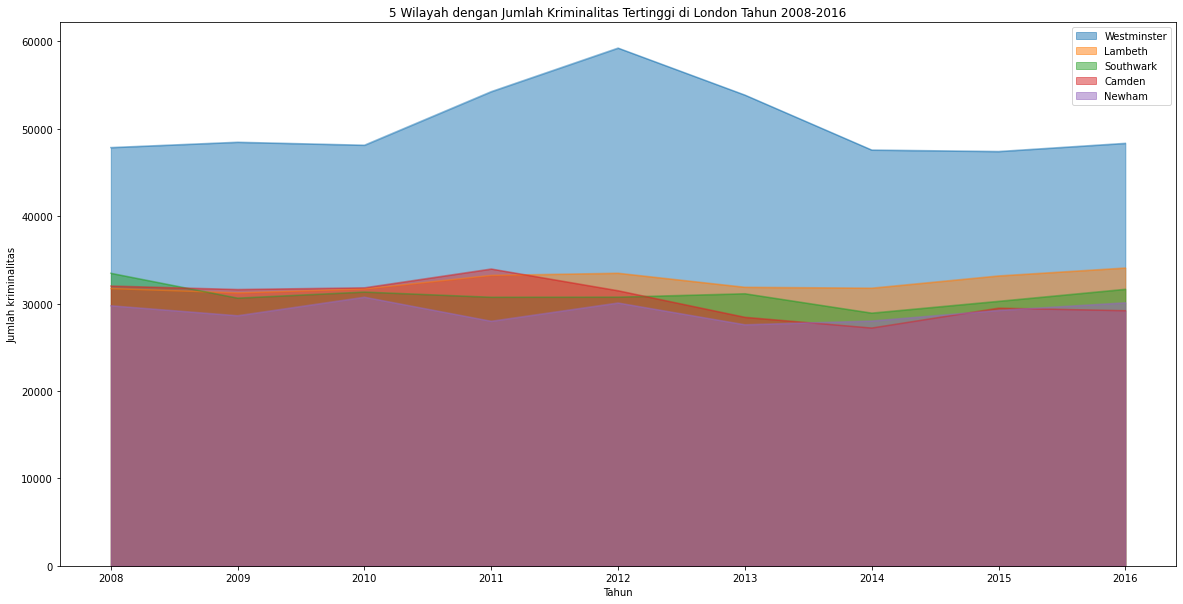

In [156]:
#area plot
df_top5bor.index = df_top5bor.index.map(int)

df_top5bor.plot(kind='area',
            stacked=False,
            figsize=(20, 10),
            )

plt.title('5 Wilayah dengan Jumlah Kriminalitas Tertinggi di London Tahun 2008-2016')
plt.ylabel('Jumlah kriminalitas')
plt.xlabel('Tahun')

plt.show()

In [157]:
# 3. conclusion ....

---
# B. Histogram

In [1]:
# Question: ......

In [2]:
# 1. pre-processing as needed

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#read csv
df_london = pd.read_csv('D:/Kuliah/Hacktiv8/Sesi/dataset/london_crime_by_lsoa.csv')
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [5]:
#cek missing value
df_london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [6]:
#cek tipe data
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
#pilih year
y2012 = df_london[(df_london['year'] == 2012)]
y2012

,lsoa_code,borough,major_category,minor_category,value,year,month
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
15,E01002358,Havering,Violence Against the Person,Wounding/GBH,0,2012,2
20,E01003651,Redbridge,Violence Against the Person,Harassment,0,2012,2
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
...,...,...,...,...,...,...,...
13490559,E01002257,Havering,Other Notifiable Offences,Other Notifiable,0,2012,8
13490563,E01004353,Waltham Forest,Violence Against the Person,Offensive Weapon,0,2012,12
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1


In [8]:
#urutkan data berdasarkan kolom value scr descending
y2012.sort_values(["value"], ascending=False, axis=0, inplace=True)

C:\Users\Isal\AppData\Local\Temp\ipykernel_10812\1465056723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2012.sort_values(["value"], ascending=False, axis=0, inplace=True)


In [9]:
y2012

,lsoa_code,borough,major_category,minor_category,value,year,month
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309,2012,6
9077246,E01004734,Westminster,Theft and Handling,Other Theft,240,2012,3
13313421,E01004734,Westminster,Theft and Handling,Other Theft,236,2012,1
10161081,E01033595,Westminster,Theft and Handling,Other Theft,221,2012,12
10414804,E01004734,Westminster,Theft and Handling,Other Theft,220,2012,12
...,...,...,...,...,...,...,...
5146577,E01000506,Brent,Violence Against the Person,Offensive Weapon,0,2012,4
5146573,E01004542,Wandsworth,Criminal Damage,Criminal Damage To Motor Vehicle,0,2012,9
5146571,E01003125,Lambeth,Theft and Handling,Other Theft Person,0,2012,2
5146542,E01000428,Bexley,Sexual Offences,Other Sexual,0,2012,9


In [10]:
#total kriminal tiap wilayah tahun 2012
df_bor2012 = y2012.groupby(['borough']).sum()

In [11]:
#hapus kolom yg tdk digunakan
df_bor2012.drop(['year','month'], axis=1, inplace=True)

In [12]:
#urutkan data berdasarkan kolom total scr descending
df_bor2012.sort_values(['value'], ascending=False, axis=0, inplace=True)
df_bor2012.reset_index()

,borough,value
0,Westminster,59226
1,Lambeth,33473
2,Camden,31472
3,Southwark,30737
4,Croydon,30189
5,Newham,30067
6,Ealing,28832
7,Hackney,27095
8,Tower Hamlets,26784
9,Brent,26357


In [13]:
#np.histogram return 2 values

count, bin_edges = np.histogram(df_bor2012)

print(count)  #freq count
print(bin_edges)   #bin ranges, default=10 bins

[ 1  4  4 12  6  5  0  0  0  1]
[  157.   6063.9 11970.8 17877.7 23784.6 29691.5 35598.4 41505.3 47412.2
 53319.1 59226. ]


In [14]:
# 2. create visualization

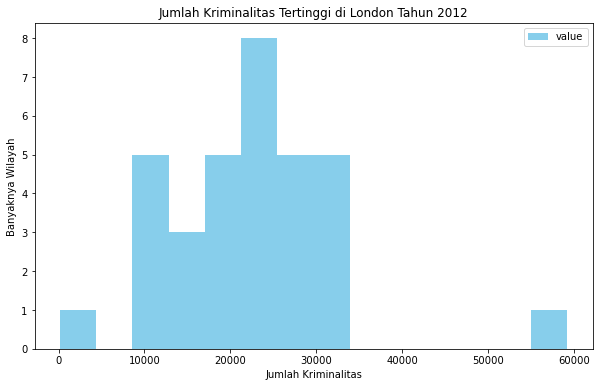

In [15]:
#histogram
df_bor2012.plot(kind='hist', bins=14, figsize=(10, 6), color=['skyblue'])

plt.title('Jumlah Kriminalitas Tertinggi di London Tahun 2012')
plt.ylabel('Banyaknya Wilayah')
plt.xlabel('Jumlah Kriminalitas')

plt.show()

In [16]:
# 3. conclusion ....

---
# C. Bar Chart


In [17]:
# Question:

In [18]:
# 1. pre-processing as needed

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#read csv
df_london = pd.read_csv('D:/Kuliah/Hacktiv8/Sesi/dataset/london_crime_by_lsoa.csv')
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [21]:
#cek missing value
df_london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [22]:
#cek tipe data
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [23]:
#pilih major category
west = df_london[(df_london['borough'] == "Redbridge")]
west

,lsoa_code,borough,major_category,minor_category,value,year,month
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
17,E01003708,Redbridge,Violence Against the Person,Common Assault,0,2009,6
20,E01003651,Redbridge,Violence Against the Person,Harassment,0,2012,2
76,E01003744,Redbridge,Theft and Handling,Other Theft Person,0,2008,3
80,E01003738,Redbridge,Violence Against the Person,Other violence,0,2011,2
...,...,...,...,...,...,...,...
13490428,E01003765,Redbridge,Violence Against the Person,Assault with Injury,0,2008,5
13490443,E01003739,Redbridge,Violence Against the Person,Harassment,0,2011,12
13490460,E01003774,Redbridge,Theft and Handling,Other Theft,0,2014,5
13490469,E01003783,Redbridge,Drugs,Possession Of Drugs,5,2016,3


In [24]:
#ubah nama kolom jd string
west.columns = list(map(str, west.columns))

In [25]:
#urutkan data berdasarkan tahun
west.sort_values(['year','month','value'], ascending=True, axis=0, inplace=True)
west

C:\Users\Isal\AppData\Local\Temp\ipykernel_10812\518602073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west.sort_values(['year','month','value'], ascending=True, axis=0, inplace=True)


,lsoa_code,borough,major_category,minor_category,value,year,month
5729,E01003777,Redbridge,Other Notifiable Offences,Going Equipped,0,2008,1
21862,E01003754,Redbridge,Other Notifiable Offences,Other Notifiable,0,2008,1
25367,E01003703,Redbridge,Theft and Handling,Handling Stolen Goods,0,2008,1
36300,E01003708,Redbridge,Theft and Handling,Other Theft Person,0,2008,1
50726,E01003658,Redbridge,Theft and Handling,Other Theft Person,0,2008,1
...,...,...,...,...,...,...,...
7212558,E01003689,Redbridge,Theft and Handling,Other Theft Person,15,2016,12
1180458,E01003689,Redbridge,Theft and Handling,Other Theft,16,2016,12
6640840,E01003767,Redbridge,Theft and Handling,Other Theft,16,2016,12
351831,E01003783,Redbridge,Theft and Handling,Theft From Shops,19,2016,12


In [26]:
west.drop(['month'], axis=1, inplace=True)

C:\Users\Isal\AppData\Local\Temp\ipykernel_10812\2922808543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west.drop(['month'], axis=1, inplace=True)


In [27]:
#sum year
df_year = west.groupby(['year']).sum()
df_year

,value
year,
2008,20873
2009,20837
2010,20652
2011,21994
2012,21424
2013,19793
2014,19590
2015,18897
2016,19502


In [28]:
# 2. create visualization

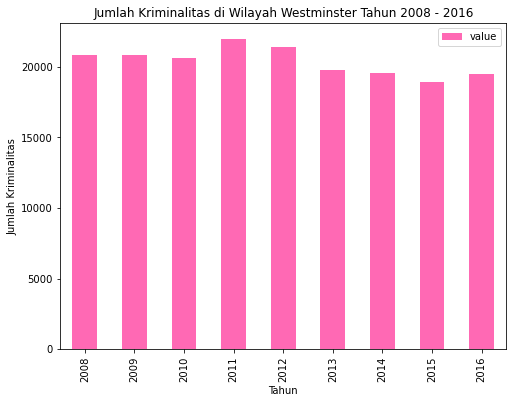

In [29]:
df_year.plot(kind='bar', figsize=(8, 6), color='hotpink')

plt.title('Jumlah Kriminalitas di Wilayah Westminster Tahun 2008 - 2016')
plt.ylim(ymin=0)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kriminalitas')

plt.show()

In [30]:
# 3. conclusion ....

---
# D. Pie Chart

In [186]:
# Question: ......

In [187]:
# 1. pre-processing as needed

In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
#read csv
df_london = pd.read_csv('D:/Kuliah/Hacktiv8/Sesi/dataset/london_crime_by_lsoa.csv')
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [190]:
#cek missing value
df_london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [191]:
#cek tipe data
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [192]:
#pilih major category
bur = df_london[(df_london['major_category'] == "Burglary") &
               (df_london['year'] == 2013)]
bur

,lsoa_code,borough,major_category,minor_category,value,year,month
30,E01001317,Ealing,Burglary,Burglary in a Dwelling,0,2013,9
53,E01000869,Camden,Burglary,Burglary in Other Buildings,0,2013,3
97,E01004142,Sutton,Burglary,Burglary in Other Buildings,3,2013,5
136,E01000098,Barking and Dagenham,Burglary,Burglary in Other Buildings,0,2013,4
247,E01032640,Southwark,Burglary,Burglary in a Dwelling,0,2013,10
...,...,...,...,...,...,...,...
13490079,E01003538,Newham,Burglary,Burglary in Other Buildings,0,2013,10
13490219,E01002747,Islington,Burglary,Burglary in a Dwelling,1,2013,12
13490291,E01002155,Harrow,Burglary,Burglary in a Dwelling,3,2013,12
13490413,E01003472,Merton,Burglary,Burglary in Other Buildings,0,2013,9


In [193]:
#ubah nama kolom jd string
bur.columns = list(map(str, bur.columns))

In [194]:
#group
df_group = bur.groupby(['borough', 'year'])[['value']].sum()
df_group

,,value
borough,year,
Barking and Dagenham,2013,2222
Barnet,2013,4262
Bexley,2013,1784
Brent,2013,3084
Bromley,2013,3121
Camden,2013,3085
City of London,2013,3
Croydon,2013,3958
Ealing,2013,3584


In [195]:
#ubah nama kolom value jadi total
df_group.rename(columns={"value":"total"}, inplace=True)

In [196]:
#reset index menjadi awal terlebih dahulu
df_group.reset_index(inplace=True)

In [197]:
df_group

,borough,year,total
0,Barking and Dagenham,2013,2222
1,Barnet,2013,4262
2,Bexley,2013,1784
3,Brent,2013,3084
4,Bromley,2013,3121
5,Camden,2013,3085
6,City of London,2013,3
7,Croydon,2013,3958
8,Ealing,2013,3584
9,Enfield,2013,3449


In [198]:
#buat variabel years utk menampung list years yg ada di dlm dataframe df_group
boroughs = list(df_group["borough"].unique())
boroughs

['Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'City of London',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

In [199]:
#buat variabel years utk menampung list years yg ada di dlm dataframe df_group
years = list(df_group["year"].unique())
years

[2013]

In [200]:
#inisiasi dataframe kosong dari kolom years dan index boroughs
df_boryear = pd.DataFrame(df_group, columns=years, index=boroughs)
df_boryear.head()

,2013
Barking and Dagenham,NaN
Barnet,NaN
Bexley,NaN
Brent,NaN
Bromley,NaN


In [201]:
#mengisi data pada dataframe df_boryear
for borough in boroughs:
    for year in years:
        df_boryear.at[borough, year] = int(df_group.loc[
            (df_group["borough"] == borough)
            & (df_group["year"] == year), "total"
        ])

In [202]:
#buat kolom total yg akan digunakan  utk mengurutkan borough
df_boryear["total"] = df_boryear.sum(axis=1)

In [203]:
#urutkan data berdasarkan kolom total scr descending
df_boryear.sort_values(["total"], ascending=False, inplace=True)

In [204]:
#cek borough sutton
df_top5 = df_boryear.head()
df_top5

,2013,total
Barnet,4262.0,4262.0
Croydon,3958.0,3958.0
Westminster,3906.0,3906.0
Lambeth,3876.0,3876.0
Ealing,3584.0,3584.0


In [205]:
#reset index to put in back in as a column
df_top5.reset_index(inplace=True)

In [206]:
df_top5

,index,2013,total
0,Barnet,4262.0,4262.0
1,Croydon,3958.0,3958.0
2,Westminster,3906.0,3906.0
3,Lambeth,3876.0,3876.0
4,Ealing,3584.0,3584.0


In [207]:
#rename kolom
df_top5.rename(columns={'index':'borough'}, inplace=True)
df_top5.columns

C:\Users\Isal\AppData\Local\Temp\ipykernel_10544\2596959938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5.rename(columns={'index':'borough'}, inplace=True)


Index(['borough', 2013, 'total'], dtype='object')

In [208]:
#set index borough
df_top5.set_index("borough")

,2013,total
borough,,
Barnet,4262.0,4262.0
Croydon,3958.0,3958.0
Westminster,3906.0,3906.0
Lambeth,3876.0,3876.0
Ealing,3584.0,3584.0


In [209]:
#group contries by borough and apply sum() function

df_borough = df_top5.groupby('borough', axis=0).sum()

print(type(df_top5.groupby('borough', axis=0)))

df_borough.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,2013,total
borough,,
Barnet,4262.0,4262.0
Croydon,3958.0,3958.0
Ealing,3584.0,3584.0
Lambeth,3876.0,3876.0
Westminster,3906.0,3906.0


In [210]:
# 2. create visualization

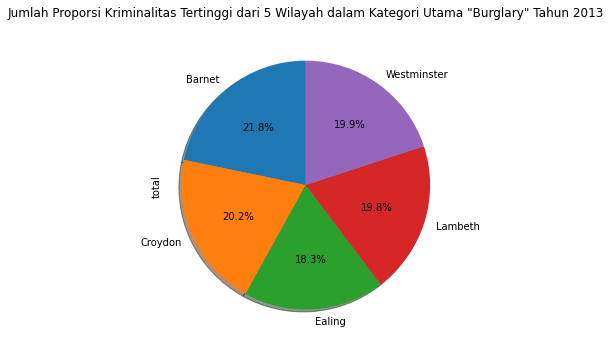

In [211]:
#plot data: dg passing kind='pie'

df_borough['total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                           )

plt.title('Jumlah Proporsi Kriminalitas Tertinggi dari 5 Wilayah dalam Kategori Utama "Burglary" Tahun 2013')
plt.axis('equal')

plt.show()

In [212]:
# 3. conclusion ....

---
# E. Box Plot

In [31]:
# Question: ......

In [32]:
# 1. pre-processing as needed

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
#read csv
df_london = pd.read_csv('D:/Kuliah/Hacktiv8/Sesi/dataset/london_crime_by_lsoa.csv')
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [35]:
#cek missing value
df_london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [36]:
#cek tipe data
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [37]:
#pilih borough
sutton = df_london[(df_london['borough'] == "Sutton")]
sutton

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
19,E01004195,Sutton,Drugs,Possession Of Drugs,0,2009,10
79,E01004165,Sutton,Robbery,Personal Property,1,2008,1
97,E01004142,Sutton,Burglary,Burglary in Other Buildings,3,2013,5
101,E01004093,Sutton,Violence Against the Person,Wounding/GBH,0,2016,7
...,...,...,...,...,...,...,...
13490331,E01004115,Sutton,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2009,2
13490364,E01004173,Sutton,Violence Against the Person,Harassment,0,2009,12
13490380,E01004142,Sutton,Violence Against the Person,Common Assault,4,2013,7
13490579,E01004100,Sutton,Drugs,Drug Trafficking,0,2016,12


In [38]:
#ubah nama kolom jd string
sutton.columns = list(map(str, sutton.columns))

In [39]:
#group
df_group = sutton.groupby(['borough', 'year'])[['value']].sum()
df_group

value
borough year       
Sutton  2008  12943
        2009  12240
        2010  12032
        2011  11068
        2012  10948
        2013  10057
        2014  10443
        2015  10598
        2016  10658

In [40]:
#ubah nama kolom value jadi total
df_group.rename(columns={"value":"total"}, inplace=True)

In [41]:
#reset index menjadi awal terlebih dahulu
df_group.reset_index(inplace=True)

In [42]:
df_group

,borough,year,total
0,Sutton,2008,12943
1,Sutton,2009,12240
2,Sutton,2010,12032
3,Sutton,2011,11068
4,Sutton,2012,10948
5,Sutton,2013,10057
6,Sutton,2014,10443
7,Sutton,2015,10598
8,Sutton,2016,10658


In [43]:
#buat variabel years utk menampung list years yg ada di dlm dataframe df_group
boroughs = list(df_group["borough"].unique())
boroughs

['Sutton']

In [44]:
#buat variabel years utk menampung list years yg ada di dlm dataframe df_group
years = list(df_group["year"].unique())
years

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [45]:
#inisiasi dataframe kosong dari kolom years dan index boroughs
df_boryear = pd.DataFrame(df_group, columns=years, index=boroughs)
df_boryear.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016
Sutton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#mengisi data pada dataframe df_boryear
for borough in boroughs:
    for year in years:
        df_boryear.at[borough, year] = int(df_group.loc[
            (df_group["borough"] == borough)
            & (df_group["year"] == year), "total"
        ])

In [47]:
#buat kolom total yg akan digunakan  utk mengurutkan borough
df_boryear["total"] = df_boryear.sum(axis=1)

In [48]:
#urutkan data berdasarkan kolom total scr descending
df_boryear.sort_values(["total"], ascending=False, inplace=True)

In [49]:
#cek borough sutton
df_top5 = df_boryear
df_top5

,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Sutton,12943.0,12240.0,12032.0,11068.0,10948.0,10057.0,10443.0,10598.0,10658.0,100987.0


In [50]:
#hapus kolom total krn tdk dibutuhkan dlm pembuatan box plot
del df_top5["total"]

In [51]:
#transpose
df_top5bor = df_top5.transpose()

In [52]:
df_top5bor.head()

,Sutton
2008,12943.0
2009,12240.0
2010,12032.0
2011,11068.0
2012,10948.0


In [53]:
df_top5bor.describe()

,Sutton
count,9.000000
mean,11220.777778
std,963.365296
min,10057.000000
25%,10598.000000
50%,10948.000000
75%,12032.000000
max,12943.000000


In [54]:
# 2. create visualization

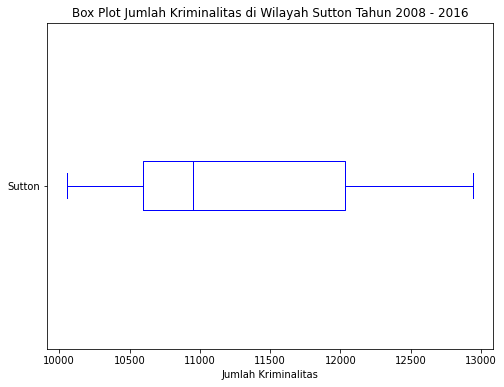

In [55]:
df_top5bor.plot(kind='box', figsize=(8, 6), color='blue', vert=False)

plt.title('Box Plot Jumlah Kriminalitas di Wilayah Sutton Tahun 2008 - 2016')
plt.xlabel('Jumlah Kriminalitas')

plt.show()

In [56]:
# 3. conclusion ....

---
# F. Scatter Plot

In [235]:
# Question: ......

In [236]:
# 1. pre-processing as needed

In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [238]:
#read csv
df_london = pd.read_csv('D:/Kuliah/Hacktiv8/Sesi/dataset/london_crime_by_lsoa.csv')
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [239]:
#cek missing value
df_london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [240]:
#cek tipe data
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [241]:
#pilih major category dan borough
df_london_crime = df_london[(df_london['borough'] == "Camden") &
                   (df_london['major_category'] == "Criminal Damage")]
df_london_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
484,E01000969,Camden,Criminal Damage,Criminal Damage To Motor Vehicle,1,2009,8
725,E01000842,Camden,Criminal Damage,Criminal Damage To Other Building,0,2008,9
805,E01000885,Camden,Criminal Damage,Criminal Damage To Other Building,0,2009,4
1073,E01000918,Camden,Criminal Damage,Criminal Damage To Dwelling,0,2015,8
1105,E01000907,Camden,Criminal Damage,Criminal Damage To Other Building,0,2015,3
...,...,...,...,...,...,...,...
13489972,E01000853,Camden,Criminal Damage,Other Criminal Damage,1,2010,12
13490095,E01000877,Camden,Criminal Damage,Criminal Damage To Other Building,0,2013,5
13490162,E01000906,Camden,Criminal Damage,Criminal Damage To Motor Vehicle,1,2009,1
13490188,E01000884,Camden,Criminal Damage,Criminal Damage To Dwelling,0,2010,3


In [242]:
#ubah nama kolom jd string
df_london_crime.columns = list(map(str, df_london_crime.columns))

In [243]:
#group
df_group = df_london_crime.groupby(['borough', 'year'])[['value']].sum()
df_group

value
borough year       
Camden  2008   2629
        2009   2569
        2010   2262
        2011   2080
        2012   1865
        2013   1576
        2014   1670
        2015   1896
        2016   1935

In [244]:
#ubah nama kolom value jadi total
df_group.rename(columns={"value":"total"}, inplace=True)

In [245]:
#reset index menjadi awal terlebih dahulu
df_group.reset_index(inplace=True)

In [246]:
df_group

,borough,year,total
0,Camden,2008,2629
1,Camden,2009,2569
2,Camden,2010,2262
3,Camden,2011,2080
4,Camden,2012,1865
5,Camden,2013,1576
6,Camden,2014,1670
7,Camden,2015,1896
8,Camden,2016,1935


In [247]:
# 2. create visualization

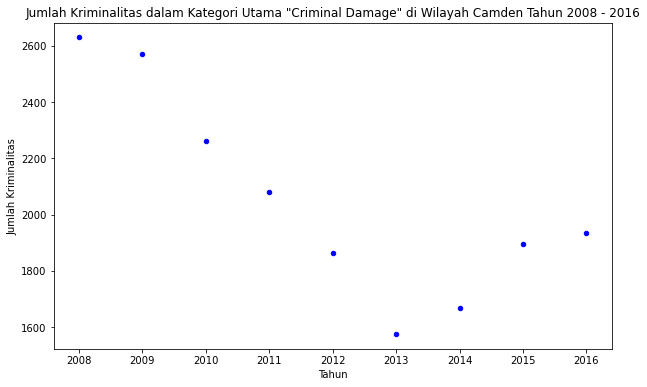

In [248]:
#scatter plot
df_group.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='blue')

plt.title('Jumlah Kriminalitas dalam Kategori Utama "Criminal Damage" di Wilayah Camden Tahun 2008 - 2016')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kriminalitas')

plt.show()

In [249]:
# 3. conclusion ....

---
# F. Word Clouds

In [57]:
# Question: ......

In [58]:
# 1. pre-processing as needed

In [59]:
#import package

from wordcloud import WordCloud, STOPWORDS
print('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [60]:
#read csv
df_london = pd.read_csv('D:/Kuliah/Hacktiv8/Sesi/dataset/london_crime_by_lsoa.csv')
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [61]:
#cek missing value
df_london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [62]:
#cek tipe data
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [63]:
#pilih major category dan year
drugs = df_london[(df_london['major_category'] == "Drugs") &
                  (df_london['year'] == 2016)]
drugs

,lsoa_code,borough,major_category,minor_category,value,year,month
224,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11
260,E01001902,Hammersmith and Fulham,Drugs,Possession Of Drugs,1,2016,2
327,E01002231,Harrow,Drugs,Possession Of Drugs,0,2016,11
486,E01000812,Bromley,Drugs,Possession Of Drugs,1,2016,1
657,E01001455,Enfield,Drugs,Drug Trafficking,0,2016,12
...,...,...,...,...,...,...,...
13490450,E01001795,Hackney,Drugs,Drug Trafficking,0,2016,8
13490469,E01003783,Redbridge,Drugs,Possession Of Drugs,5,2016,3
13490470,E01003114,Lambeth,Drugs,Possession Of Drugs,0,2016,4
13490487,E01033744,Greenwich,Drugs,Other Drugs,0,2016,9


In [64]:
#ubah nama kolom jd string
drugs.columns = list(map(str, drugs.columns))

In [65]:
#group
df_group = drugs.groupby(['borough', 'year'])[['value']].sum()
df_group

,,value
borough,year,
Barking and Dagenham,2016,919
Barnet,2016,906
Bexley,2016,646
Brent,2016,2096
Bromley,2016,728
Camden,2016,1493
City of London,2016,10
Croydon,2016,1367
Ealing,2016,1355


In [66]:
#ubah nama kolom value jadi total
df_group.rename(columns={"value":"total"}, inplace=True)

In [67]:
#reset index menjadi awal terlebih dahulu
df_group.reset_index(inplace=True)

In [68]:
df_group

,borough,year,total
0,Barking and Dagenham,2016,919
1,Barnet,2016,906
2,Bexley,2016,646
3,Brent,2016,2096
4,Bromley,2016,728
5,Camden,2016,1493
6,City of London,2016,10
7,Croydon,2016,1367
8,Ealing,2016,1355
9,Enfield,2016,1063


In [69]:
#buat variabel years utk menampung list years yg ada di dlm dataframe df_group
boroughs = list(df_group["borough"].unique())
boroughs

['Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'City of London',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

In [70]:
#buat variabel years utk menampung list years yg ada di dlm dataframe df_group
years = list(df_group["year"].unique())
years

[2016]

In [71]:
#inisiasi dataframe kosong dari kolom years dan index boroughs
df_boryear = pd.DataFrame(df_group, columns=years, index=boroughs)
df_boryear.head()

,2016
Barking and Dagenham,NaN
Barnet,NaN
Bexley,NaN
Brent,NaN
Bromley,NaN


In [72]:
#mengisi data pada dataframe df_boryear
for borough in boroughs:
    for year in years:
        df_boryear.at[borough, year] = int(df_group.loc[
            (df_group["borough"] == borough)
            & (df_group["year"] == year), "total"
        ])

In [73]:
#buat kolom total yg akan digunakan  utk mengurutkan borough
df_boryear["total"] = df_boryear.sum(axis=1)

In [74]:
#urutkan data berdasarkan kolom total scr descending
df_boryear.sort_values(["total"], ascending=False, inplace=True)

In [75]:
#cek data
df_boryear

,2016,total
Lambeth,2738.0,2738.0
Brent,2096.0,2096.0
Westminster,2049.0,2049.0
Southwark,1838.0,1838.0
Islington,1777.0,1777.0
Newham,1684.0,1684.0
Kensington and Chelsea,1680.0,1680.0
Tower Hamlets,1629.0,1629.0
Lewisham,1617.0,1617.0
Haringey,1540.0,1540.0


In [76]:
#total drugs thn 2013

total_drugs = df_boryear['total'].sum()
total_drugs

38914.0

In [77]:
max_words = 100
word_string = ''
for country in df_boryear.index.values:
    
    #chek if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_boryear.loc[country,'total']/float(total_drugs)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
        
#display the generated text
word_string

'Lambeth Lambeth Lambeth Lambeth Lambeth Lambeth Lambeth Brent Brent Brent Brent Brent Westminster Westminster Westminster Westminster Westminster Southwark Southwark Southwark Southwark Islington Islington Islington Islington Newham Newham Newham Newham Lewisham Lewisham Lewisham Lewisham Haringey Haringey Haringey Camden Camden Camden Croydon Croydon Croydon Ealing Ealing Ealing Hackney Hackney Hackney Hounslow Hounslow Enfield Enfield Hillingdon Hillingdon Redbridge Redbridge Barnet Barnet Wandsworth Wandsworth Greenwich Greenwich Bromley Havering Bexley Harrow Merton Sutton '

In [78]:
#create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


In [79]:
# 2. create visualization

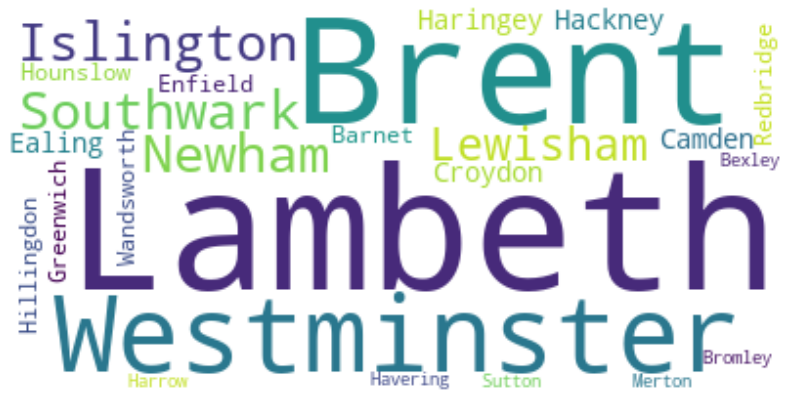

In [80]:
#word clouds
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [81]:
# 3. conclusion ....

# Overall Analysis